**Import Library**

In [ ]:
!pip install xlrd==2.0.1

     |████████████████████████████████| 96 kB 1.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import pandas as pd
import numpy as np
import spacy
from spacy import cli
from spacy import displacy
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Overview**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/capstone/Full_OneQuesh_Rating_Report.csv")

In [ ]:
data.head(5)

,User Id,Quesh,Quesh Date,Respo,Respo Rating,Respo Comment
0,229,What is something that you've learned to accept?,2022-02-20,sometimes you have to let friends go to be the...,4,...
1,228,What is something that you've learned to accept?,2022-02-20,Life is seldom what you thought it would be.,4,...
2,227,What is something that you've learned to accept?,2022-02-20,Hogwarts is not real :(,4,...
3,226,What is something that you've learned to accept?,2022-02-20,That I am here and not there. That sounds real...,3,...
4,147,What is something that you've learned to accept?,2022-02-20,That Oscar Isaac will never be my boyfriend. ?,3,...


In [ ]:
data.shape

(2442, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User Id        2442 non-null   int64 
 1   Quesh          2442 non-null   object
 2   Quesh Date     2442 non-null   object
 3   Respo          2441 non-null   object
 4   Respo Rating   2442 non-null   int64 
 5   Respo Comment  2094 non-null   object
dtypes: int64(2), object(4)
memory usage: 114.6+ KB


**Sentimental score for the answers**

In [ ]:
for i in range(len(data.Respo)):
  if type(data.Respo[i]) != str:
    print(i)
    data.Respo[i] = str(data.Respo[i])

1074


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
!pip install afinn
from afinn import Afinn

     |████████████████████████████████| 52 kB 819 kB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=e661a92ebecb729583ddad59ff8cd55709c503451bc9ebaca5fcf86aa65d5ea4
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [ ]:
afinn = Afinn()

In [ ]:
def sentiment(text):
    return afinn.score(text)

In [ ]:
# create "sent" to store the afinn score of the answer
data['sent_ans'] = data.Respo.apply(sentiment)
data.sent_ans.describe()

count    2442.000000
mean        1.851351
std         3.859316
min        -9.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        42.000000
Name: sent_ans, dtype: float64

In [ ]:
data.head(20)

,User Id,Quesh,Quesh Date,Respo,Respo Rating,Respo Comment,sent_ans
0,229,What is something that you've learned to accept?,2022-02-20,sometimes you have to let friends go to be the...,4,...,3.0
1,228,What is something that you've learned to accept?,2022-02-20,Life is seldom what you thought it would be.,4,...,0.0
2,227,What is something that you've learned to accept?,2022-02-20,Hogwarts is not real :(,4,...,0.0
3,226,What is something that you've learned to accept?,2022-02-20,That I am here and not there. That sounds real...,3,...,12.0
4,147,What is something that you've learned to accept?,2022-02-20,That Oscar Isaac will never be my boyfriend. ?,3,...,0.0
5,225,What is something that you've learned to accept?,2022-02-20,Getting old is inevitable but how you are when...,0,NaN,0.0
6,224,What is something that you've learned to accept?,2022-02-20,Clutter is a part of me.,0,NaN,0.0
7,223,What is something that you've learned to accept?,2022-02-20,That everyone has their shit. Everyone is flaw...,5,...,-7.0
8,222,What is something that you've learned to accept?,2022-02-20,theres not enough hours in a day to work and r...,3,...,0.0
9,170,What is something that you've learned to accept?,2022-02-20,That I can't teach my husband how to clean aft...,3,...,3.0


In [ ]:
# calculate the average score of every answer for each question
score_df = (data.groupby(['Quesh', 'Quesh Date'])).mean()
score_df = score_df.reset_index()
score_df.drop(['User Id'], axis=1, inplace=True)
score_df

,Quesh,Quesh Date,Respo Rating,sent_ans
0,"As a child, what was your dream job?",2022-01-24,3.944444,1.555556
1,"At the moment, do you tend to save more or spend?",2021-11-09,3.769231,0.000000
2,Blue Cheese or Ranch?,2022-01-29,3.789474,0.105263
3,Cake or Pie?,2021-11-10,4.083333,1.250000
4,Crunchy Peanut Butter or Smooth?,2022-02-16,4.000000,0.920000
...,...,...,...,...
150,Would you rather eat every meal out or every m...,2021-11-03,4.538462,2.153846
151,Would you rather hire a housekeeper or a perso...,2022-01-26,3.941176,2.352941
152,Would you rather move every year or live in th...,2021-12-08,3.625000,0.875000
153,You're invited to a cookie swap! What type of ...,2021-12-02,3.531250,0.625000


In [ ]:
score_df = score_df.sort_values(by="Quesh Date")
score_df.head()

,Quesh,Quesh Date,Respo Rating,sent_ans
5,"Do you sleep on your back, side or belly?",2021-09-19,4.200000,0.000000
77,What is something you could never get enough of?,2021-09-20,4.625000,1.875000
133,Where is somewhere you want to go next summer?,2021-09-21,4.642857,2.428571
138,Which fall activity do you adore most?,2021-09-22,4.636364,1.000000
38,"On a scale from 1 to 10, how productive have y...",2021-09-23,4.000000,0.461538


In [ ]:
# sort value by sentimental score to see the ranking
score_df.sort_values(by = 'sent_ans', ascending = False).head(10)

,Quesh,Quesh Date,Respo Rating,sent_ans
11,How would you describe your friends?,2021-09-27,4.800000,7.400000
55,What do you love to do for others?,2022-02-12,4.136364,7.136364
52,What compliment do you love hearing?,2022-02-06,4.266667,7.000000
51,What company inspires you most?,2021-11-15,4.500000,6.000000
145,Who has been your best teacher and why?,2021-10-05,4.500000,5.944444
69,What have you learned about love?,2022-01-09,4.533333,5.533333
108,What was the best hotel experience you've had?,2022-01-22,3.833333,5.166667
10,How has November been for you so far?,2021-11-14,4.333333,5.111111
68,What has been the highlight of your week?,2021-10-17,4.384615,4.384615
29,"If you were to create a podcast, what would it...",2021-09-30,4.750000,4.375000


Sentimental score for the questions

In [ ]:
for i in range(len(score_df.Quesh)):
  if type(score_df.Quesh[i]) != str:
    print(i)
    score_df.Quesh[i] = str(score_df.Quesh[i])

In [ ]:
# create "sent" to store the afinn score of the answer
score_df['sent_quesh'] = score_df.Quesh.apply(sentiment)
score_df.sent_quesh.describe()

count    155.000000
mean       1.470968
std        1.600770
min       -1.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        7.000000
Name: sent_quesh, dtype: float64

In [ ]:
score_df.head(5)

,Quesh,Quesh Date,Respo Rating,sent_ans,sent_quesh
5,"Do you sleep on your back, side or belly?",2021-09-19,4.200000,0.000000,0.0
77,What is something you could never get enough of?,2021-09-20,4.625000,1.875000,0.0
133,Where is somewhere you want to go next summer?,2021-09-21,4.642857,2.428571,1.0
138,Which fall activity do you adore most?,2021-09-22,4.636364,1.000000,3.0
38,"On a scale from 1 to 10, how productive have y...",2021-09-23,4.000000,0.461538,0.0


In [ ]:
from google.colab import files
score_df.to_csv('sentiment_score.csv', index = False) 
files.download('sentiment_score.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
quesh_sent = score_df['Quesh'].groupby(by=score_df['sent_quesh']).count().to_frame()

In [ ]:
quesh_sent = quesh_sent.reset_index()
quesh_sent = quesh_sent.set_index('sent_quesh')
quesh_sent

,Quesh
sent_quesh,
-1.0,2
0.0,60
1.0,24
2.0,25
3.0,34
4.0,1
5.0,5
6.0,3
7.0,1


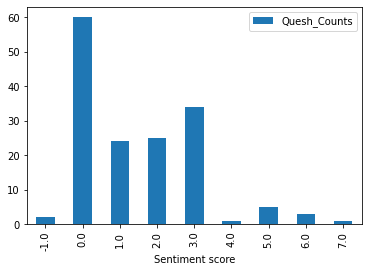

In [ ]:
quesh_sent.plot(kind = 'bar')
plt.legend(['Quesh_Counts'])
plt.xlabel('Sentiment score')
plt.show()